# <h1 align="center" style='color:purple'><u>Bangalore Housing Price Analysis</u></h1>

<h3 style='color:blue'>1. Introduction & Problem Statement</h3>

<b style='align:right'>Objective:</b>

+ Understand factors affecting property prices in Bangalore.
+ Identify patterns and trends in price per sqft.
+ Detect and remove outliers for cleaner data.
+ Visualize relationships between different features.

<h3 style='color:blue'>2. Import Python Libraries & Load Data</h3>

In [21]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 


df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [22]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is <b>12000000(12 million)</b>, which is too much price for price per sqft. It seems that this dataset has some very bad outliers so we will first remove those with the <b>percentile method</b> and then use <b>z-score</b>.

**Plotting** histogram to see how is the data distribution

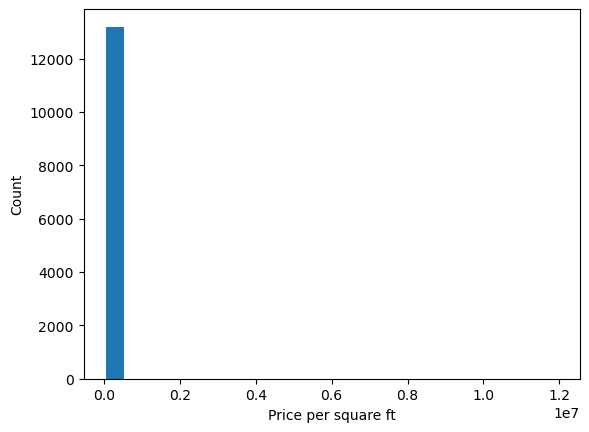

In [23]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

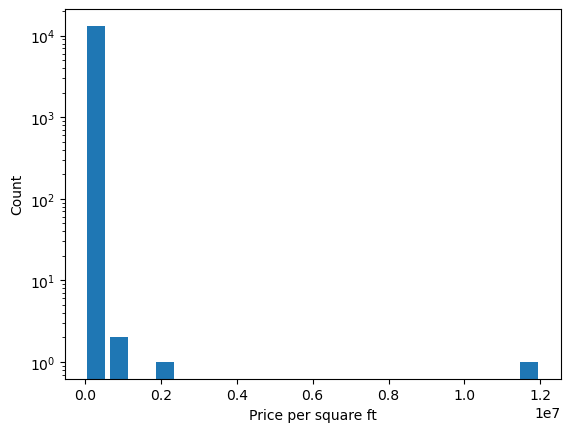

In [24]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Ohh now we can see few bars on right hand side of our highest building at least :)

### <h3 style='color:blue'>1. Treating outliers using percentile.</h3>

In [25]:
low_limit,high_limit = df.price_per_sqft.quantile([0.001,0.999])
low_limit,high_limit

(1366.184, 50959.36200000098)

In [26]:
outliers= df[(df.price_per_sqft < low_limit)|(df.price_per_sqft > high_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
7012,other,1 BHK,650.0,1.0,500.0,1,76923
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the Bangalore city.You might be lucky if you find such a property, though. Lol! 😆. Also we have a property that has price per sqft value as **12000000** which is way too high. It seems almost impossible and even if it is legitimate it will be helpful for further data analysis process if we remove such data point.

In [27]:
df_2 = df[(df.price_per_sqft > low_limit)&(df.price_per_sqft < high_limit)]
df_2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12473,other,2 BHK,1100.0,2.0,90.00,2,8181
4942,Kammasandra,2 BHK,992.0,2.0,25.79,2,2599
6858,Rajaji Nagar,3 BHK,1615.0,3.0,175.00,3,10835
9077,other,5 Bedroom,1200.0,5.0,260.00,5,21666
4380,Brookefield,2 BHK,1125.0,2.0,70.00,2,6222
7262,other,4 Bedroom,1200.0,5.0,325.00,4,27083
6583,Hennur,3 BHK,1260.0,2.0,52.00,3,4126
8228,other,2 BHK,1166.0,2.0,65.00,2,5574
12986,Hebbal,2 BHK,1349.0,2.0,98.00,2,7264
10600,other,1 BHK,720.0,1.0,32.39,1,4498


In [28]:
df_2.shape

(13172, 7)

In [29]:
df.shape[0]-df_2.shape[0]

28

**We removed total 28 outliers using percentile method**

### <h3 style='color:blue'>2. Removing outlier using 4 standard deviation</h3>

In [30]:
max_limit = df_2.price_per_sqft.mean() + 4*df_2.price_per_sqft.std()
min_limit = df_2.price_per_sqft.mean() - 4*df_2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [31]:
outliers = df_2[(df_2.price_per_sqft < min_limit)|(df_2.price_per_sqft > max_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9791,other,4 Bedroom,1200.0,5.0,325.0,4,27083
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500
10536,other,4 Bedroom,2400.0,4.0,595.0,4,24791
9290,other,4 Bedroom,2400.0,3.0,750.0,4,31250
7643,other,4 BHK,5422.0,6.0,1900.0,4,35042
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
12671,other,4 Bedroom,1200.0,5.0,325.0,4,27083
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193


In [35]:
df_3 = df_2[(df_2.price_per_sqft > min_limit)&(df_2.price_per_sqft < max_limit)]
df_3.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10936,Brookefield,4 Bedroom,1560.0,3.0,149.0,4,9551
1189,Kudlu Gate,3 BHK,1535.0,3.0,85.0,3,5537
8573,other,2 BHK,1000.0,2.0,51.0,2,5100
83,Hegde Nagar,6 Bedroom,3000.0,7.0,210.0,6,7000
7770,Battarahalli,3 BHK,1779.0,3.0,90.0,3,5059
10894,other,4 Bedroom,875.0,4.0,150.0,4,17142
3350,other,2 BHK,1125.0,2.0,75.0,2,6666
593,Konanakunte,3 BHK,2791.0,3.0,223.0,3,7989
5674,other,2 BHK,850.0,2.0,72.0,2,8470
10556,Bellandur,3 BHK,1717.0,3.0,110.0,3,6406


In [36]:
df_3.shape

(13047, 7)

In [37]:
df_2.shape[0] - df_3.shape[0]

125

**We removed 125 outliers using normal distribution method**

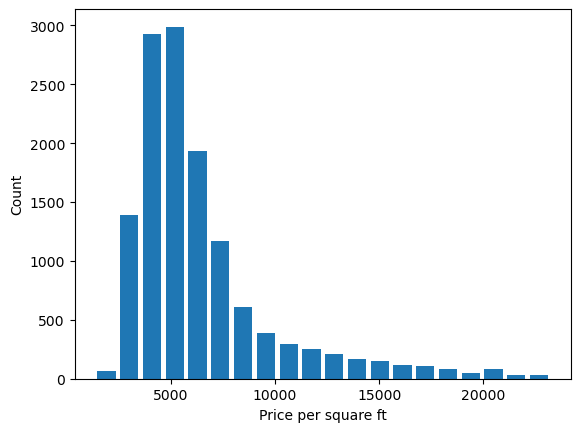

In [39]:
plt.hist(df_3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

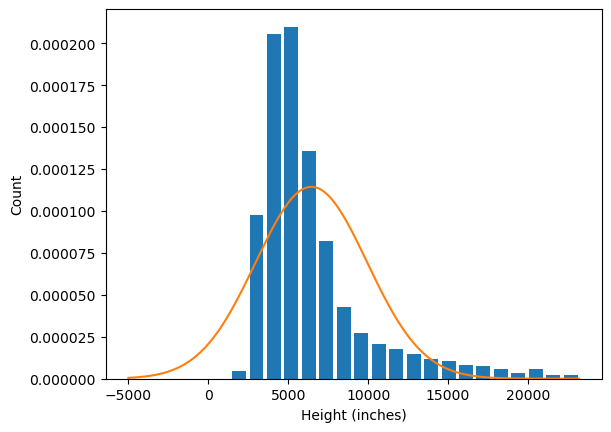

In [41]:
from scipy.stats import norm
import numpy as np

plt.hist(df_3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df_3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_3.price_per_sqft.mean(),df_3.price_per_sqft.std()))

### <h3 style = 'color:blue'>3. Removing outliers using z-score.Use z score of 4 as your threshold.</h3>

In [43]:
df_2['zscore']= (df_2.price_per_sqft - df_2.price_per_sqft.mean())/df_2.price_per_sqft.std()
df_2.sample(10)

C:\Users\Divyanshi\AppData\Local\Temp\ipykernel_11680\878203508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['zscore']= (df_2.price_per_sqft - df_2.price_per_sqft.mean())/df_2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3982,Mallasandra,2 BHK,1325.0,2.0,70.00,2,5283,-0.333409
9577,Raja Rajeshwari Nagar,3 BHK,1529.0,3.0,51.77,3,3385,-0.791750
11880,Whitefield,3 BHK,1396.0,3.0,74.00,3,5300,-0.329304
1671,other,3 BHK,1760.0,3.0,176.00,3,10000,0.805682
2809,Neeladri Nagar,1 BHK,527.0,1.0,26.00,1,4933,-0.417929
10882,Jigani,3 BHK,1300.0,3.0,55.00,3,4230,-0.587694
5302,other,2 BHK,1100.0,2.0,52.00,2,4727,-0.467675
5615,other,4 Bedroom,2200.0,5.0,100.00,4,4545,-0.511626
2513,other,4 Bedroom,4000.0,4.0,170.00,4,4250,-0.582864
3735,Kanakpura Road,2 BHK,1339.0,2.0,58.00,2,4331,-0.563304


In [47]:
outliers_zs = df_2[(df_2.zscore <-4)|(df_2.zscore >4)]
outliers_zs.shape

(125, 8)

In [50]:
outliers_zs.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3340,other,19 BHK,2000.0,16.0,490.0,19,24500,4.307234
8595,other,3 Bedroom,1200.0,2.0,300.0,3,25000,4.427977
6524,other,3 Bedroom,700.0,3.0,195.0,3,27857,5.117904
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000,4.669464
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500,5.031693


In [48]:
df_no_outlier = df_2[(df_2.zscore >-4)&(df_2.zscore <4)]

In [51]:
df_no_outlier.shape

(13047, 8)

In [52]:
df_2.shape[0] - df_no_outlier.shape[0]

125

**In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation**